In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
from collections import Counter
import re

In [10]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already available
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to C:\Users\FPT
[nltk_data]     SHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\FPT
[nltk_data]     SHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\FPT
[nltk_data]     SHOP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [11]:
# Load the datasets
episodes_path = "data/power_rangers_episodes.csv"
seasons_path = "data/power_rangers_seasons.csv"

episodes_df = pd.read_csv(episodes_path)
seasons_df = pd.read_csv(seasons_path)

# Display basic information and first few rows of each dataset
episodes_info = episodes_df.info(), episodes_df.head()
seasons_info = seasons_df.info(), seasons_df.head()

episodes_info, seasons_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season_title   921 non-null    object 
 1   episode_num    921 non-null    int64  
 2   episode_title  921 non-null    object 
 3   air_date       921 non-null    object 
 4   IMDB_rating    921 non-null    float64
 5   total_votes    921 non-null    int64  
 6   desc           921 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 50.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season_title        28 non-null     object 
 1   season_num          28 non-null     int64  
 2   number_of_episodes  28 non-null     int64  
 3   air_date_first_ep   28 non-null     object 
 4   air_date_last_ep    28 non-null     

((None,
                  season_title  episode_num          episode_title    air_date  \
  0  Mighty Morphin (Season 1)            0       The Lost Episode  1999-05-22   
  1  Mighty Morphin (Season 1)            1    Day of the Dumpster  1993-08-28   
  2  Mighty Morphin (Season 1)            2              High Five  1993-09-04   
  3  Mighty Morphin (Season 1)            3               Teamwork  1993-09-08   
  4  Mighty Morphin (Season 1)            4  A Pressing Engagement  1993-09-09   
  
     IMDB_rating  total_votes                                               desc  
  0          6.7          113          Original version of the premiere episode.  
  1          7.4          687  Following the accidental release of long-impri...  
  2          6.9          564  Rita plans to trap the Rangers in a time trap ...  
  3          7.3          546  Trini and Kimberly set up a petition to clean ...  
  4          6.9          535  Jason is trying to break the bench press recor...  

In [12]:
# Check a few descriptions to understand the structure
episodes_df["desc"].head()

0            Original version of the premiere episode.
1    Following the accidental release of long-impri...
2    Rita plans to trap the Rangers in a time trap ...
3    Trini and Kimberly set up a petition to clean ...
4    Jason is trying to break the bench press recor...
Name: desc, dtype: object

In [22]:

# Define stopwords and preprocess descriptions
stop_words = set(stopwords.words("english"))

common_words = set(["rangers", "power", "new", "battle", "team", "fight", "evil", 
                    "must", "tries", "defeat", "one", "two", "three", "help", "save", 
                    "forces", "gets", "finds", "makes", "take", "plan", "set", "trap"])

# Tokenize and count word frequencies
word_counter = Counter()
for desc in episodes_df["desc"].dropna():
    words = re.findall(r'\b[A-Z][a-z]+(?:\s[A-Z][a-z]+)?\b', desc)  # Extract capitalized words (names)
    filtered_words = [word.lower() for word in words if word.lower() not in common_words]  # Filter out common words
    word_counter.update(filtered_words)

# Get the 20 most common words
word_counter.most_common(20)

[('the', 115),
 ('the rangers', 100),
 ('tommy', 87),
 ('power rangers', 81),
 ('earth', 75),
 ('rita', 72),
 ('meanwhile', 67),
 ('ranger', 50),
 ('wes', 49),
 ('kimberly', 46),
 ('lord zedd', 46),
 ('when', 46),
 ('he', 43),
 ('angel grove', 42),
 ('bulk', 38),
 ('dr', 38),
 ('skull', 35),
 ('they', 35),
 ('jason', 33),
 ('with', 33)]

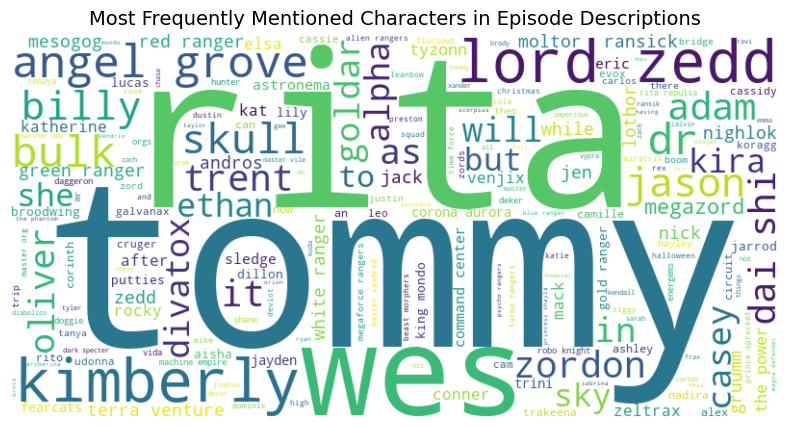

In [23]:
from wordcloud import WordCloud

non_char_words = ["the", "power rangers", "the rangers", "meanwhile", "he", "they", "when", "with", "ranger", "monster", "earth"]
# Filter out non-character words
character_counts = {word: count for word, count in word_counter.items() if word not in non_char_words}

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(character_counts)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequently Mentioned Characters in Episode Descriptions", fontsize=14)
plt.show()

C:\Users\FPT SHOP\AppData\Local\Temp\ipykernel_15352\1532050254.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_characters.keys()), y=list(top_characters.values()), palette="coolwarm")


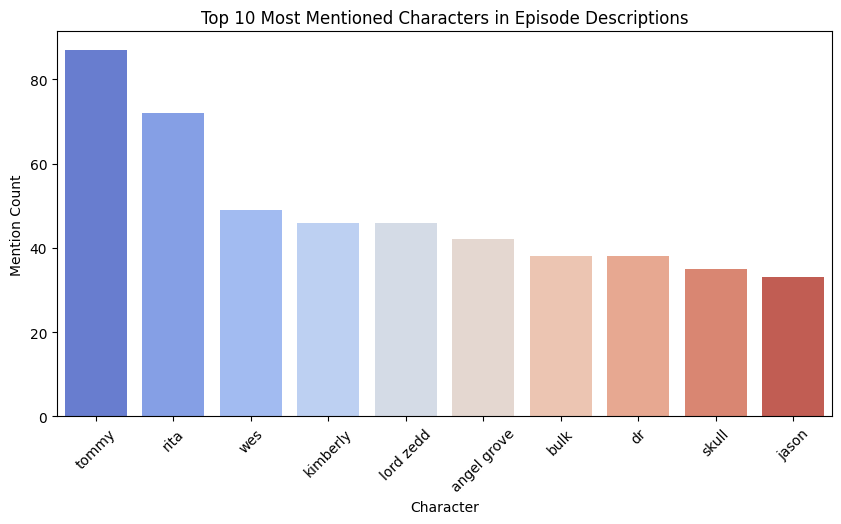

In [24]:
# Select top 10 most mentioned characters
top_characters = dict(sorted(character_counts.items(), key=lambda x: x[1], reverse=True)[:10])

# Create bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=list(top_characters.keys()), y=list(top_characters.values()), palette="coolwarm")
plt.xlabel("Character")
plt.ylabel("Mention Count")
plt.title("Top 10 Most Mentioned Characters in Episode Descriptions")
plt.xticks(rotation=45)
plt.show()

In [26]:
# Group descriptions by season
season_character_counts = {}

for season, group in episodes_df.groupby("season_title"):
    word_counter = Counter()
    for desc in group["desc"].dropna():
        words = re.findall(r'\b[A-Z][a-z]+(?:\s[A-Z][a-z]+)?\b', desc)  # Extract capitalized words
        filtered_words = [word for word in words if word not in ["The", "Power Rangers", "The Rangers", "Meanwhile", "He", "They", "When", "With"]]
        word_counter.update(filtered_words)
    
    # Get the most mentioned character for the season
    most_common_character = word_counter.most_common(1)
    season_character_counts[season] = most_common_character[0][0] if most_common_character else None

# Convert to DataFrame for better readability
season_char_df = pd.DataFrame(list(season_character_counts.items()), columns=["Season", "Most Common Character"])

# Display results
season_char_df

,Season,Most Common Character
0,Beast Morphers (Season 1),Rangers
1,Beast Morphers (Season 2),Evox
2,Dino Charge,Rangers
3,Dino Super Charge,Snide
4,Dino Thunder,Trent
5,In Space,Andros
6,Jungle Fury,Dai Shi
7,Lightspeed Rescue,Rangers
8,Lost Galaxy,Terra Venture
9,Megaforce,Megaforce Rangers


In [29]:
# Merge the most common character data with season IMDb ratings
season_analysis_df = seasons_df.merge(season_char_df, left_on="season_title", right_on="Season", how="left")

# Select relevant columns
season_analysis_df = season_analysis_df[["season_title", "Most Common Character", "IMDB_rating"]]

# Group by character to find the average IMDb rating of seasons they were most mentioned in
character_ratings = season_analysis_df.groupby("Most Common Character")["IMDB_rating"].mean().reset_index()

# Sort by highest average IMDb rating
character_ratings = character_ratings.sort_values(by="IMDB_rating", ascending=False)

# Display results
character_ratings

,Most Common Character,IMDB_rating
0,Andros,7.300000
16,Wes,7.100000
12,Terra Venture,6.900000
3,Evox,6.800000
14,Trent,6.800000
7,Nick,6.700000
1,Dai Shi,6.600000
13,Tommy,6.600000
15,Venjix,6.600000
5,Lord Zedd,6.500000


C:\Users\FPT SHOP\AppData\Local\Temp\ipykernel_15352\1416756903.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=character_ratings["Most Common Character"], x=character_ratings["IMDB_rating"], palette="viridis")


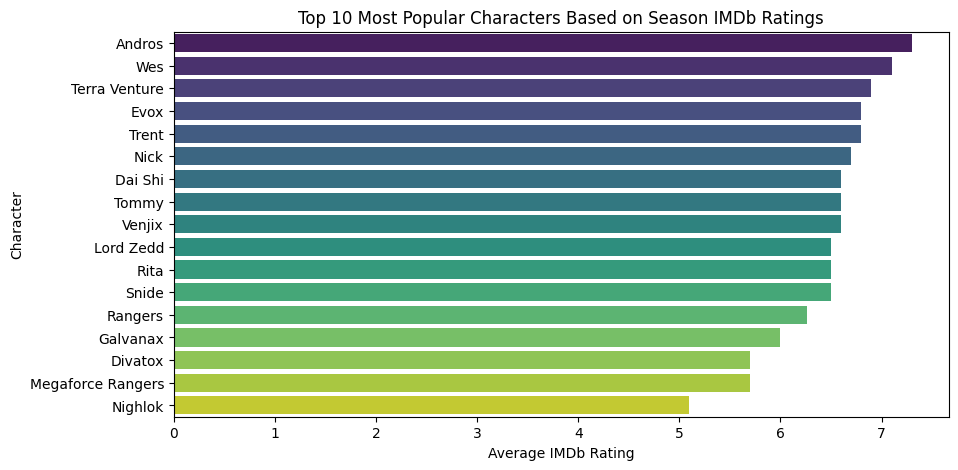

In [33]:
# Plot the top 10 most popular characters by IMDb rating
plt.figure(figsize=(10, 5))
# sns.barplot(y=character_ratings["Most Common Character"][:10], x=character_ratings["IMDB_rating"][:10], palette="viridis")
sns.barplot(y=character_ratings["Most Common Character"], x=character_ratings["IMDB_rating"], palette="viridis")

plt.xlabel("Average IMDb Rating")
plt.ylabel("Character")
plt.title("Top 10 Most Popular Characters Based on Season IMDb Ratings")
# plt.xlim(0, 7.5)  # Adjust x-axis for better visualization

plt.show()
